In [1]:

import pandas as pd
# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27\\diabetes.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(5)) 
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [2]:
import numpy as np
diabetes_data_copy = df.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [3]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [34]:

# split data table into data X and class labels y
X = diabetes_data_copy.iloc[:,0:8].values
y =diabetes_data_copy.iloc[:,-1].values

In [35]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=5)  # 8 components and check with 2
Y_sklearn = sklearn_pca.fit_transform(X)


In [24]:
#Y_sklearn

In [36]:
np.set_printoptions(suppress=True)
sklearn_pca.explained_variance_ratio_

array([0.86828653, 0.08726962, 0.01977354, 0.01198757, 0.00901707])

In [37]:
print(abs(sklearn_pca.components_ ))

[[0.00127812 0.16220944 0.00811852 0.01661258 0.98635215 0.01502292
  0.0004978  0.01510197]
 [0.02053651 0.96669685 0.12603904 0.05263417 0.16366866 0.04739165
  0.00102887 0.13185145]
 [0.10574154 0.19452133 0.73345473 0.19233975 0.01141573 0.13058802
  0.00033534 0.59903765]
 [0.11315725 0.00388876 0.44233068 0.37957875 0.00496047 0.35859018
  0.00124064 0.7202991 ]
 [0.04380791 0.03312887 0.48845586 0.75626321 0.01256385 0.34279464
  0.0036775  0.26226062]]


In [46]:
loadings = pd.DataFrame(sklearn_pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], 
                        index=df2.columns)
loadings

,PC1,PC2,PC3,PC4,PC5
Pregnancies,0.001278,0.020537,0.105742,-0.113157,0.043808
Glucose,0.162209,0.966697,-0.194521,0.003889,-0.033129
BloodPressure,0.008119,0.126039,0.733455,0.442331,-0.488456
SkinThickness,0.016613,0.052634,0.192340,0.379579,0.756263
Insulin,0.986352,-0.163669,0.011416,-0.004960,-0.012564
BMI,0.015023,0.047392,0.130588,0.358590,0.342795
DiabetesPedigreeFunction,0.000498,0.001029,-0.000335,0.001241,0.003677
Age,0.015102,0.131851,0.599038,-0.720299,0.262261


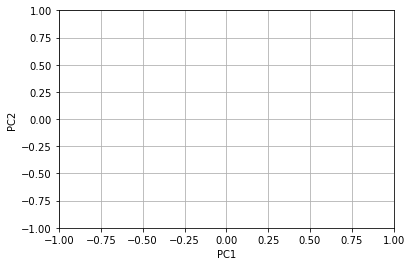

In [20]:
## biplot
import numpy as np
import matplotlib.pyplot as plt
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()




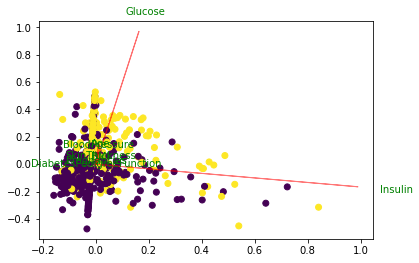

In [40]:
#Call the function. Use only the 2 PCs.
myplot(Y_sklearn[:,0:2],np.transpose(sklearn_pca.components_[0:2, :]),
       labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']  )                 
                                                           

plt.show()

In [39]:
# abobe Glucose,Insulin may be good
df2 = df.iloc[:,0:8]
df2.keys()


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [41]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 2), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 2), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

   
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,14))
    

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    # Explained Variance = EV
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "EV\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

#

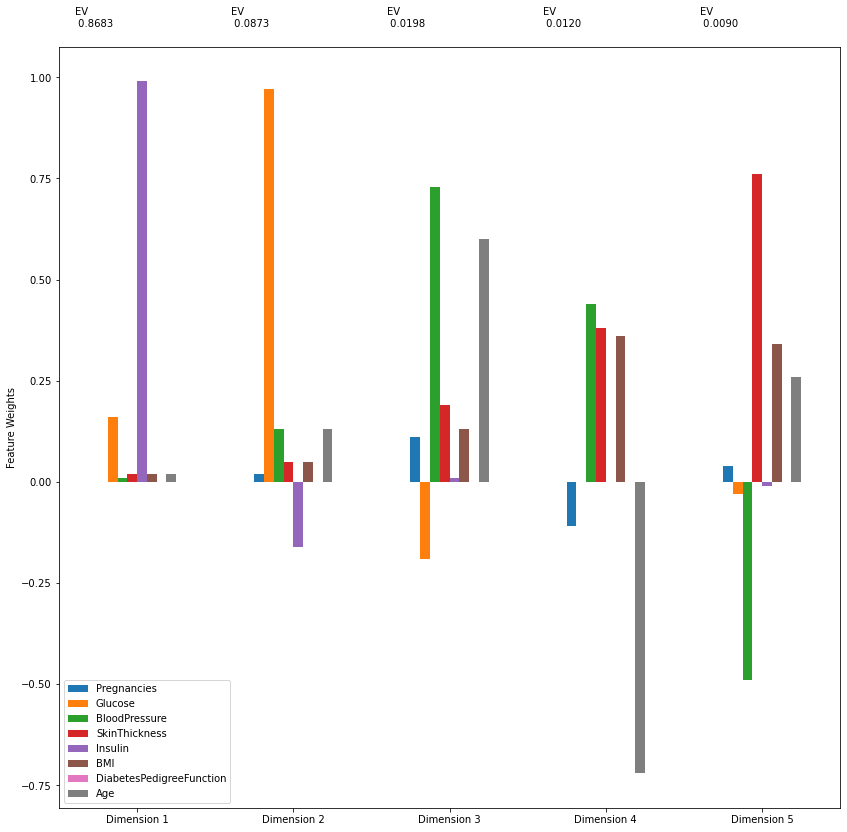

In [42]:
pca_results = pca_results(df2 ,sklearn_pca)

In [43]:
pca_results.cumsum()

,Explained Variance,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Dimension 1,0.87,0.00,0.16,0.01,0.02,0.99,0.02,0.0,0.02
Dimension 2,0.96,0.02,1.13,0.14,0.07,0.83,0.07,0.0,0.15
Dimension 3,0.98,0.13,0.94,0.87,0.26,0.84,0.20,0.0,0.75
Dimension 4,0.99,0.02,0.94,1.31,0.64,0.84,0.56,0.0,0.03
Dimension 5,1.00,0.06,0.91,0.82,1.40,0.83,0.90,0.0,0.29


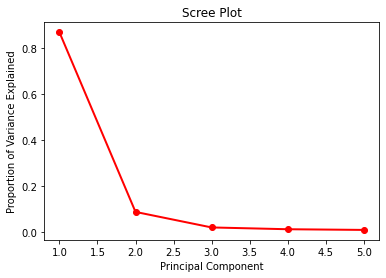

In [44]:
# scree plot - Like Elbow
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#pca = sklearnPCA(n_components=2)
PC_values = np.arange(sklearn_pca.n_components_) + 1

# explained_variance_ratio = EVR
plt.plot(PC_values, sklearn_pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()